In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [2]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

In [3]:
skylake_2d = pd.read_csv("Skylake_CSR_Random_BrCast_Reduce_SpMV.csv")

In [9]:
skylake_2d.groupby("nProcess").count().reset_index()

,nProcess,Name,MatrixSize,AvgRow,MinTime,MaxTime,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,NonZeroPerRow,AvgNonZeroPerBlock,MaxNonZeroPerBlock
0,16,18,18,18,18,18,18,18,18,18,18,18,18,18
1,25,18,18,18,18,18,18,18,18,18,18,18,18,18
2,36,19,19,19,19,19,19,19,19,19,19,19,19,19
3,49,18,18,18,18,18,18,18,18,18,18,18,18,18
4,64,16,16,16,16,16,16,16,16,16,16,16,16,16
5,81,18,18,18,18,18,18,18,18,18,18,18,18,18
6,100,22,22,22,22,22,22,22,22,22,22,22,22,22


In [36]:
skylake_2d_100 = skylake_2d[skylake_2d["nProcess"] == 100]
skylake_2d_100 = skylake_2d_100.groupby("Name").mean()
skylake_2d_100

,MatrixSize,AvgRow,MinTime,MaxTime,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,nProcess,NonZeroPerRow,AvgNonZeroPerBlock,MaxNonZeroPerBlock
Name,,,,,,,,,,,,,
333SP_random_100,3712815,371282,25.069111,1241.498654,487.122923,13.743520,2.497866,18.076743,100,100,0.600883,222172.0,223097
AS365_random_100,3799275,379928,25.773676,1314.337455,557.151418,10.088148,2.545592,19.897335,100,100,0.601388,227361.0,228484
G3_circuit_random_100,1585478,158548,23.394406,564.874602,239.047908,8.964758,0.783460,16.120596,100,100,0.386085,60753.0,61213
M6_random_100,3501776,350178,23.708642,943.834155,409.548062,9.632028,2.376484,15.373527,100,100,0.603302,210038.0,211263
NLR_random_100,4163763,416377,23.954732,837.873589,532.239321,7.573140,2.798352,20.831195,100,100,0.602526,249759.0,250878
af_shell10_random_100,1508065,150807,22.100427,553.483543,292.224056,9.927917,2.486836,10.838562,100,100,3.406175,511642.0,513675
asia_random_100,11950757,1195076,145.539571,2014.995764,1031.441972,103.064247,5.543028,41.751114,100,100,0.213433,254232.0,255069
cage15_random_100,5154859,515486,27.415574,1687.275663,761.589978,11.450339,6.392125,17.709405,100,100,1.828279,940446.0,942452
coPapersCiteseer_random_100,434102,43411,19.930514,187.595889,78.206084,8.658633,1.069159,16.368551,100,100,7.488263,320734.0,325073


In [32]:
skylake_2d_100 = skylake_2d_100.reset_index(drop=True)
skylake_2d_100 = skylake_2d_100.sort_values(by=["AvgRow"])
skylake_2d_100[(skylake_2d_100["AvgRow"] > 32768) & (skylake_2d_100["AvgRow"] <= 1310720)]

,MatrixSize,AvgRow,MinTime,MaxTime,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,nProcess,NonZeroPerRow,AvgNonZeroPerBlock,MaxNonZeroPerBlock
8,434102,43411,19.930514,187.595889,78.206084,8.658633,1.069159,16.368551,100,100,7.488263,320734.0,325073
9,540486,54049,19.941730,210.168979,87.652596,12.322940,1.187630,15.504770,100,100,5.803179,304914.0,313656
11,1000000,100000,20.938951,298.584350,147.224394,12.767924,0.447508,10.847932,100,100,0.405300,39960.0,40530
18,1227087,122709,23.377957,368.227509,200.354806,12.632761,0.745024,12.625027,100,100,0.603762,73522.0,74087
5,1508065,150807,22.100427,553.483543,292.224056,9.927917,2.486836,10.838562,100,100,3.406175,511642.0,513675
2,1585478,158548,23.394406,564.874602,239.047908,8.964758,0.783460,16.120596,100,100,0.386085,60753.0,61213
17,1821882,182189,30.332773,1090.044577,300.639131,17.368256,3.410621,43.906115,100,100,3.362025,600000.0,612524
13,2063494,206350,25.451574,727.147002,336.934866,11.020790,1.358672,17.940455,100,100,0.638449,129646.0,131744
3,3501776,350178,23.708642,943.834155,409.548062,9.632028,2.376484,15.373527,100,100,0.603302,210038.0,211263
0,3712815,371282,25.069111,1241.498654,487.122923,13.743520,2.497866,18.076743,100,100,0.600883,222172.0,223097


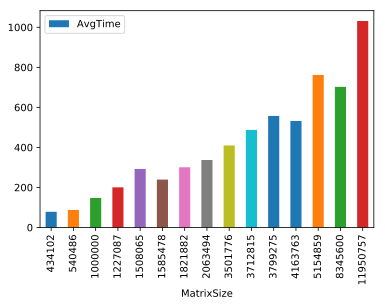

In [34]:
skylake_2d_100[(skylake_2d_100["AvgRow"] > 32768) & (skylake_2d_100["AvgRow"] <= 1310720)].sort_values(by=["AvgRow"]).plot(kind="bar", x="MatrixSize", y="AvgTime")

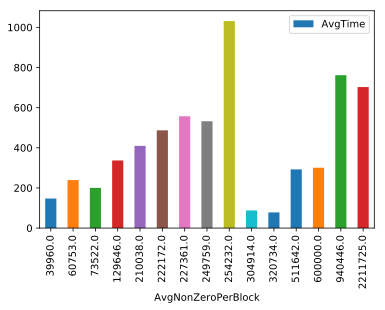

In [35]:
skylake_2d_100[(skylake_2d_100["AvgRow"] > 32768) & (skylake_2d_100["AvgRow"] <= 1310720)].sort_values(by=["AvgNonZeroPerBlock"]).plot(kind="bar", x="AvgNonZeroPerBlock", y="AvgTime")